In [1]:
import pandas as pd

# Load the data
data = data = pd.read_csv("C:/Users/admin/OneDrive/maytinh/Downloads/New folder/META_stock_data.csv") 


In [2]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [3]:
data['MA21'] = data['Close'].rolling(window=21).mean()

In [4]:
def calculate_rsi(data, window=21):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

data['RSI'] = calculate_rsi(data['Close'])


In [5]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MA21,RSI
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,NaN,NaN
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,NaN,100.000000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,NaN,71.003698
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,NaN,24.676995
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,NaN,22.365335


In [6]:
data.dropna()

,Date,High,Low,Open,Close,Volume,Adj Close,MA21,RSI
20,2019-10-28,68.167999,64.519997,65.508003,65.542000,94351500.0,65.542000,51.627428,82.661350
21,2019-10-29,64.860001,62.950001,63.998001,63.243999,63421500.0,63.243999,52.345047,76.085299
22,2019-10-30,63.757999,61.993999,62.599998,63.001999,48209000.0,63.001999,53.014762,74.791986
23,2019-10-31,63.799999,62.599998,62.619999,62.984001,25335000.0,62.984001,53.698476,75.575351
24,2019-11-01,63.296001,61.959999,63.264000,62.661999,31919500.0,62.661999,54.463047,80.441375
...,...,...,...,...,...,...,...,...,...
634,2022-04-05,1152.869995,1087.300049,1136.300049,1091.260010,26691700.0,1091.260010,958.362366,72.724977
635,2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010,968.903317,66.860649
636,2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010,978.345700,65.653577
637,2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990,987.259510,64.522791


In [7]:
import numpy as np

# Tính toán số lượng dòng cho từng phần
total_rows = len(data)
train_size = int(0.8 * total_rows)
val_size = int(0.1 * total_rows)
test_size = total_rows - train_size - val_size
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(how='any', axis=0, inplace=True)

# Chia DataFrame thành các tập huấn luyện, kiểm tra và kiểm định
data_train = data.iloc[:train_size]
data_val = data.iloc[train_size:train_size + val_size]
data_test = data.iloc[train_size + val_size:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
import warnings

pd.options.mode.chained_assignment = None 
# Chuẩn hóa các cột giá dựa trên tập huấn luyện và áp dụng cho tập kiểm tra và kiểm định
scaler_price = MinMaxScaler(feature_range=(-1, 1))
price_columns = ['Close', 'Open','High','Low']
data_train[price_columns] = scaler_price.fit_transform(data_train[price_columns])
data_val[price_columns] = scaler_price.transform(data_val[price_columns])
data_test_copy=data_test[price_columns]
data_test[price_columns] = scaler_price.transform(data_test[price_columns])
train_data = data_train[price_columns].values
val_data = data_val[price_columns].values
test_data = data_test[price_columns].values

# Hiển thị kích thước của các tập dữ liệu
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Training data shape: (511, 4)
Validation data shape: (63, 4)
Test data shape: (45, 4)


In [9]:
# Training data
seq_len = 21
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) 
  y_train.append(train_data[:, 0][i]) 
X_train, y_train = np.array(X_train), np.array(y_train)

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 0][i])
X_val, y_val = np.array(X_val), np.array(y_val)


# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 0][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape', X_train.shape, y_train.shape)
print('Validation set shape', X_val.shape, y_val.shape)
print('Testing set shape' ,X_test.shape, y_test.shape)

Training set shape (490, 21, 4) (490,)
Validation set shape (42, 21, 4) (42,)
Testing set shape (24, 21, 4) (24,)


In [58]:
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Layer
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[-1],), initializer='random_normal', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

# Define the model
inputs = Input(shape=(21, 4))
bi_lstm = Bidirectional(LSTM(50, return_sequences=True, activation='relu'))(inputs)
attention = Attention()(bi_lstm)
outputs = Dense(1, activation='sigmoid')(attention)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy')

model.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
import time 

start_time = time.time()
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val), verbose=1)

# Predicting and reversing normalization
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler_price.inverse_transform(np.concatenate((predicted_stock_price, np.zeros((len(predicted_stock_price), 3))), axis=1))[:,0]
end_time = time.time()
training_time = end_time - start_time

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.8422 - val_loss: 0.0633
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7121 - val_loss: 0.1099
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5175 - val_loss: 0.2070
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3402 - val_loss: 0.3885
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3004 - val_loss: 0.1612
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2948 - val_loss: 0.1049
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2827 - val_loss: 0.0964
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2878 - val_loss: 0.0754
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3079 - val_loss: 0.0628
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2940 - val_loss: 0.0539
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2984 - val_loss: 0.1408
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

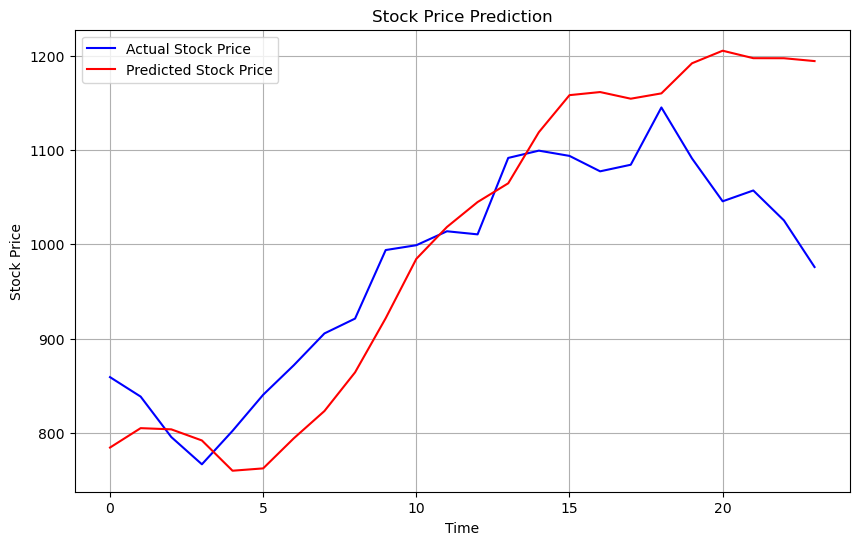

Root Mean Squared Error: 88.66916645281471
Mean Absolute Percentage Error: 0.07134686994283126
Thời gian training mô hình: 17.05433225631714


In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score

# Get actual prices from the last part of the test set
actual_prices = data_test_copy['Close'].values[seq_len:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
rmse = mean_squared_error(actual_prices, predicted_stock_price, squared=False)
print(f"Root Mean Squared Error: {rmse}")

mape = mean_absolute_percentage_error(actual_prices, predicted_stock_price)
print(f"Mean Absolute Percentage Error: {mape}")

print('Thời gian training mô hình:',training_time)